In [279]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Завантажити дані згідно варіанту.

In [280]:
df = pd.read_csv('data.csv', index_col=0)
df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,id,wins,total,%
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,1,37,133,0.278195
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,2,46,121,0.380165
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,3,89,132,0.674242
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,4,70,125,0.560000
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,5,55,112,0.491071


In [329]:
df = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', '%']]
df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,%
0,45,49,49,65,65,45,0.278195
1,60,62,63,80,80,60,0.380165
2,80,82,83,100,100,80,0.674242
3,80,100,123,122,120,80,0.560000
4,39,52,43,60,50,65,0.491071


Розділити на тренувальну, валідаційну та тестові вибірки в пропорції 70/15/15

In [282]:
train, t = train_test_split(df, test_size=0.3, random_state=42)
test, val = train_test_split(t, test_size=0.5, random_state=42)

In [283]:
train

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,%
24,55,81,60,50,70,97,0.721429
254,100,75,115,90,115,85,0.644628
445,40,29,45,29,45,36,0.146341
335,100,73,83,73,83,55,0.371901
599,95,117,80,65,70,92,0.840909
...,...,...,...,...,...,...,...
71,50,75,35,70,30,40,0.212963
106,50,50,95,40,50,35,0.202797
270,50,70,50,50,50,40,0.162963
435,77,85,51,55,51,65,0.516393


In [284]:
test

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,%
30,60,90,55,90,80,110,0.867769
78,50,85,55,65,65,90,0.747826
72,65,90,50,85,45,55,0.371901
319,50,70,100,40,40,30,0.222222
575,110,135,60,50,65,88,0.774436
...,...,...,...,...,...,...,...
81,95,75,110,100,80,30,0.152672
769,75,95,122,58,75,69,0.572581
84,52,65,55,58,62,60,0.448276
90,105,105,75,65,100,50,0.375940


In [285]:
val

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,%
411,100,150,140,100,90,90,0.796992
615,80,95,82,60,82,75,0.600000
398,95,145,130,120,90,120,0.939850
331,65,73,55,47,75,85,0.684685
617,60,105,60,120,60,105,0.884956
...,...,...,...,...,...,...,...
357,73,100,60,100,60,65,0.426573
334,70,43,53,43,53,40,0.190909
344,70,85,140,85,70,20,0.272000
231,35,65,35,65,35,65,0.466216


Обробити NaN значення - або видаленням, або заповненням середнім, або якимось іншим чином. Обраний варіант обгрунтувати.

In [286]:
df.isnull().sum()

HP         0
Attack     0
Defense    0
Sp. Atk    0
Sp. Def    0
Speed      0
%          0
dtype: int64

Нормалізувати дані - для тренувальних даних обрахувати значення mean(середнього) та standard deviation(стандартного відхилення) для кожної з ознак і перетворити дані віднявши обраховане середнє та поділивши на стандартне відхилення. Зауважте, що на відміну від Z-score тут немає модуля.

In [287]:
X_train, y_train = train.drop('%', axis=1), train['%']
X_test, y_test = test.drop('%', axis=1), test['%']
X_val, y_val = val.drop('%', axis=1), val['%']

In [288]:
mean, std = X_train.mean(), X_train.std()
mean, std

(HP         69.312044
 Attack     77.941606
 Defense    72.414234
 Sp. Atk    72.532847
 Sp. Def    70.762774
 Speed      68.266423
 dtype: float64,
 HP         26.059966
 Attack     32.918162
 Defense    31.062035
 Sp. Atk    33.187088
 Sp. Def    26.629668
 Speed      29.439775
 dtype: float64)

In [289]:
X_train = (X_train - mean) / std
X_train.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
24,-0.549197,0.092909,-0.399659,-0.678964,-0.028644,0.976012
254,1.177590,-0.089361,1.370991,0.526324,1.661201,0.568400
445,-1.124792,-1.486766,-0.882564,-1.311740,-0.967446,-1.096015
335,1.177590,-0.150118,0.340794,0.014076,0.459534,-0.450629
599,0.985725,1.186530,0.244213,-0.226981,-0.028644,0.806174


Нормалізувати валідаційні та тестові даних на основі обрахованих mean та std для тренувальних даних

In [290]:
X_test = (X_test - mean) / std
X_test.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
30,-0.357331,0.366314,-0.560628,0.526324,0.346877,1.417592
78,-0.741062,0.214422,-0.560628,-0.226981,-0.216404,0.738239
72,-0.165466,0.366314,-0.721596,0.375663,-0.967446,-0.450629
319,-0.741062,-0.241253,0.888086,-0.980286,-1.155207,-1.299820
575,1.561320,1.733341,-0.399659,-0.678964,-0.216404,0.670303


In [291]:
X_val = (X_val - mean) / std
X_val.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
411,1.177590,2.189016,2.175832,0.827646,0.722398,0.738239
615,0.410129,0.518206,0.308601,-0.377642,0.421981,0.228724
398,0.985725,2.037125,1.853895,1.430290,0.722398,1.757268
331,-0.165466,-0.150118,-0.560628,-0.769361,0.159117,0.568400
617,-0.357331,0.821990,-0.399659,1.430290,-0.404165,1.247753


Побудувати 3 різні дерева рішень (Decision tree) з різною глибиною на основі даних згідно варіанту.

In [292]:
clf1 = DecisionTreeRegressor()
clf1.fit(X_train, y_train)
# plt.figure(figsize=(100, 100))
# plot_tree(clf1)
# plt.show()

DecisionTreeRegressor()

In [293]:
clf1 = DecisionTreeRegressor(max_depth=5)
clf1.fit(X_train, y_train)
# plt.figure(figsize=(100, 100))
# plot_tree(clf1)
# plt.show()

DecisionTreeRegressor(max_depth=5)

In [294]:
clf1 = DecisionTreeRegressor(max_depth=3)
clf1.fit(X_train, y_train)
# plt.figure(figsize=(100, 100))
# plot_tree(clf1)
# plt.show()

DecisionTreeRegressor(max_depth=3)

In [295]:
errors = []
for i in range(1, 15):
    dt = DecisionTreeRegressor(max_depth=i, random_state=42)
    dt.fit(X_train, y_train)
    y_res = dt.predict(X_val) 
    errors.append(mean_squared_error(y_val, y_res))

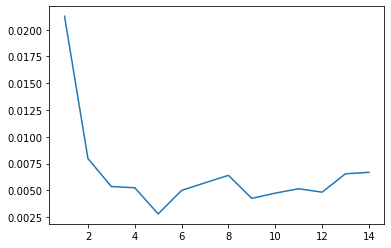

In [296]:
plt.plot(range(1, 15), errors)

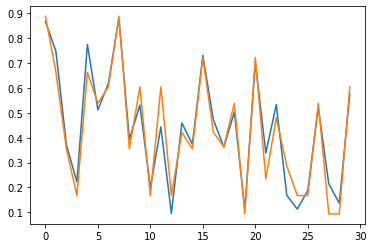

In [297]:
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_res = dt.predict(X_test)
plt.plot(range(30), y_test[:30])
plt.plot(range(30), y_res[:30])

Візуалізувати отримані дерева рішень. Порівняти точність отриманих дерев рішень на валідаційній та тренувальній вибірках.

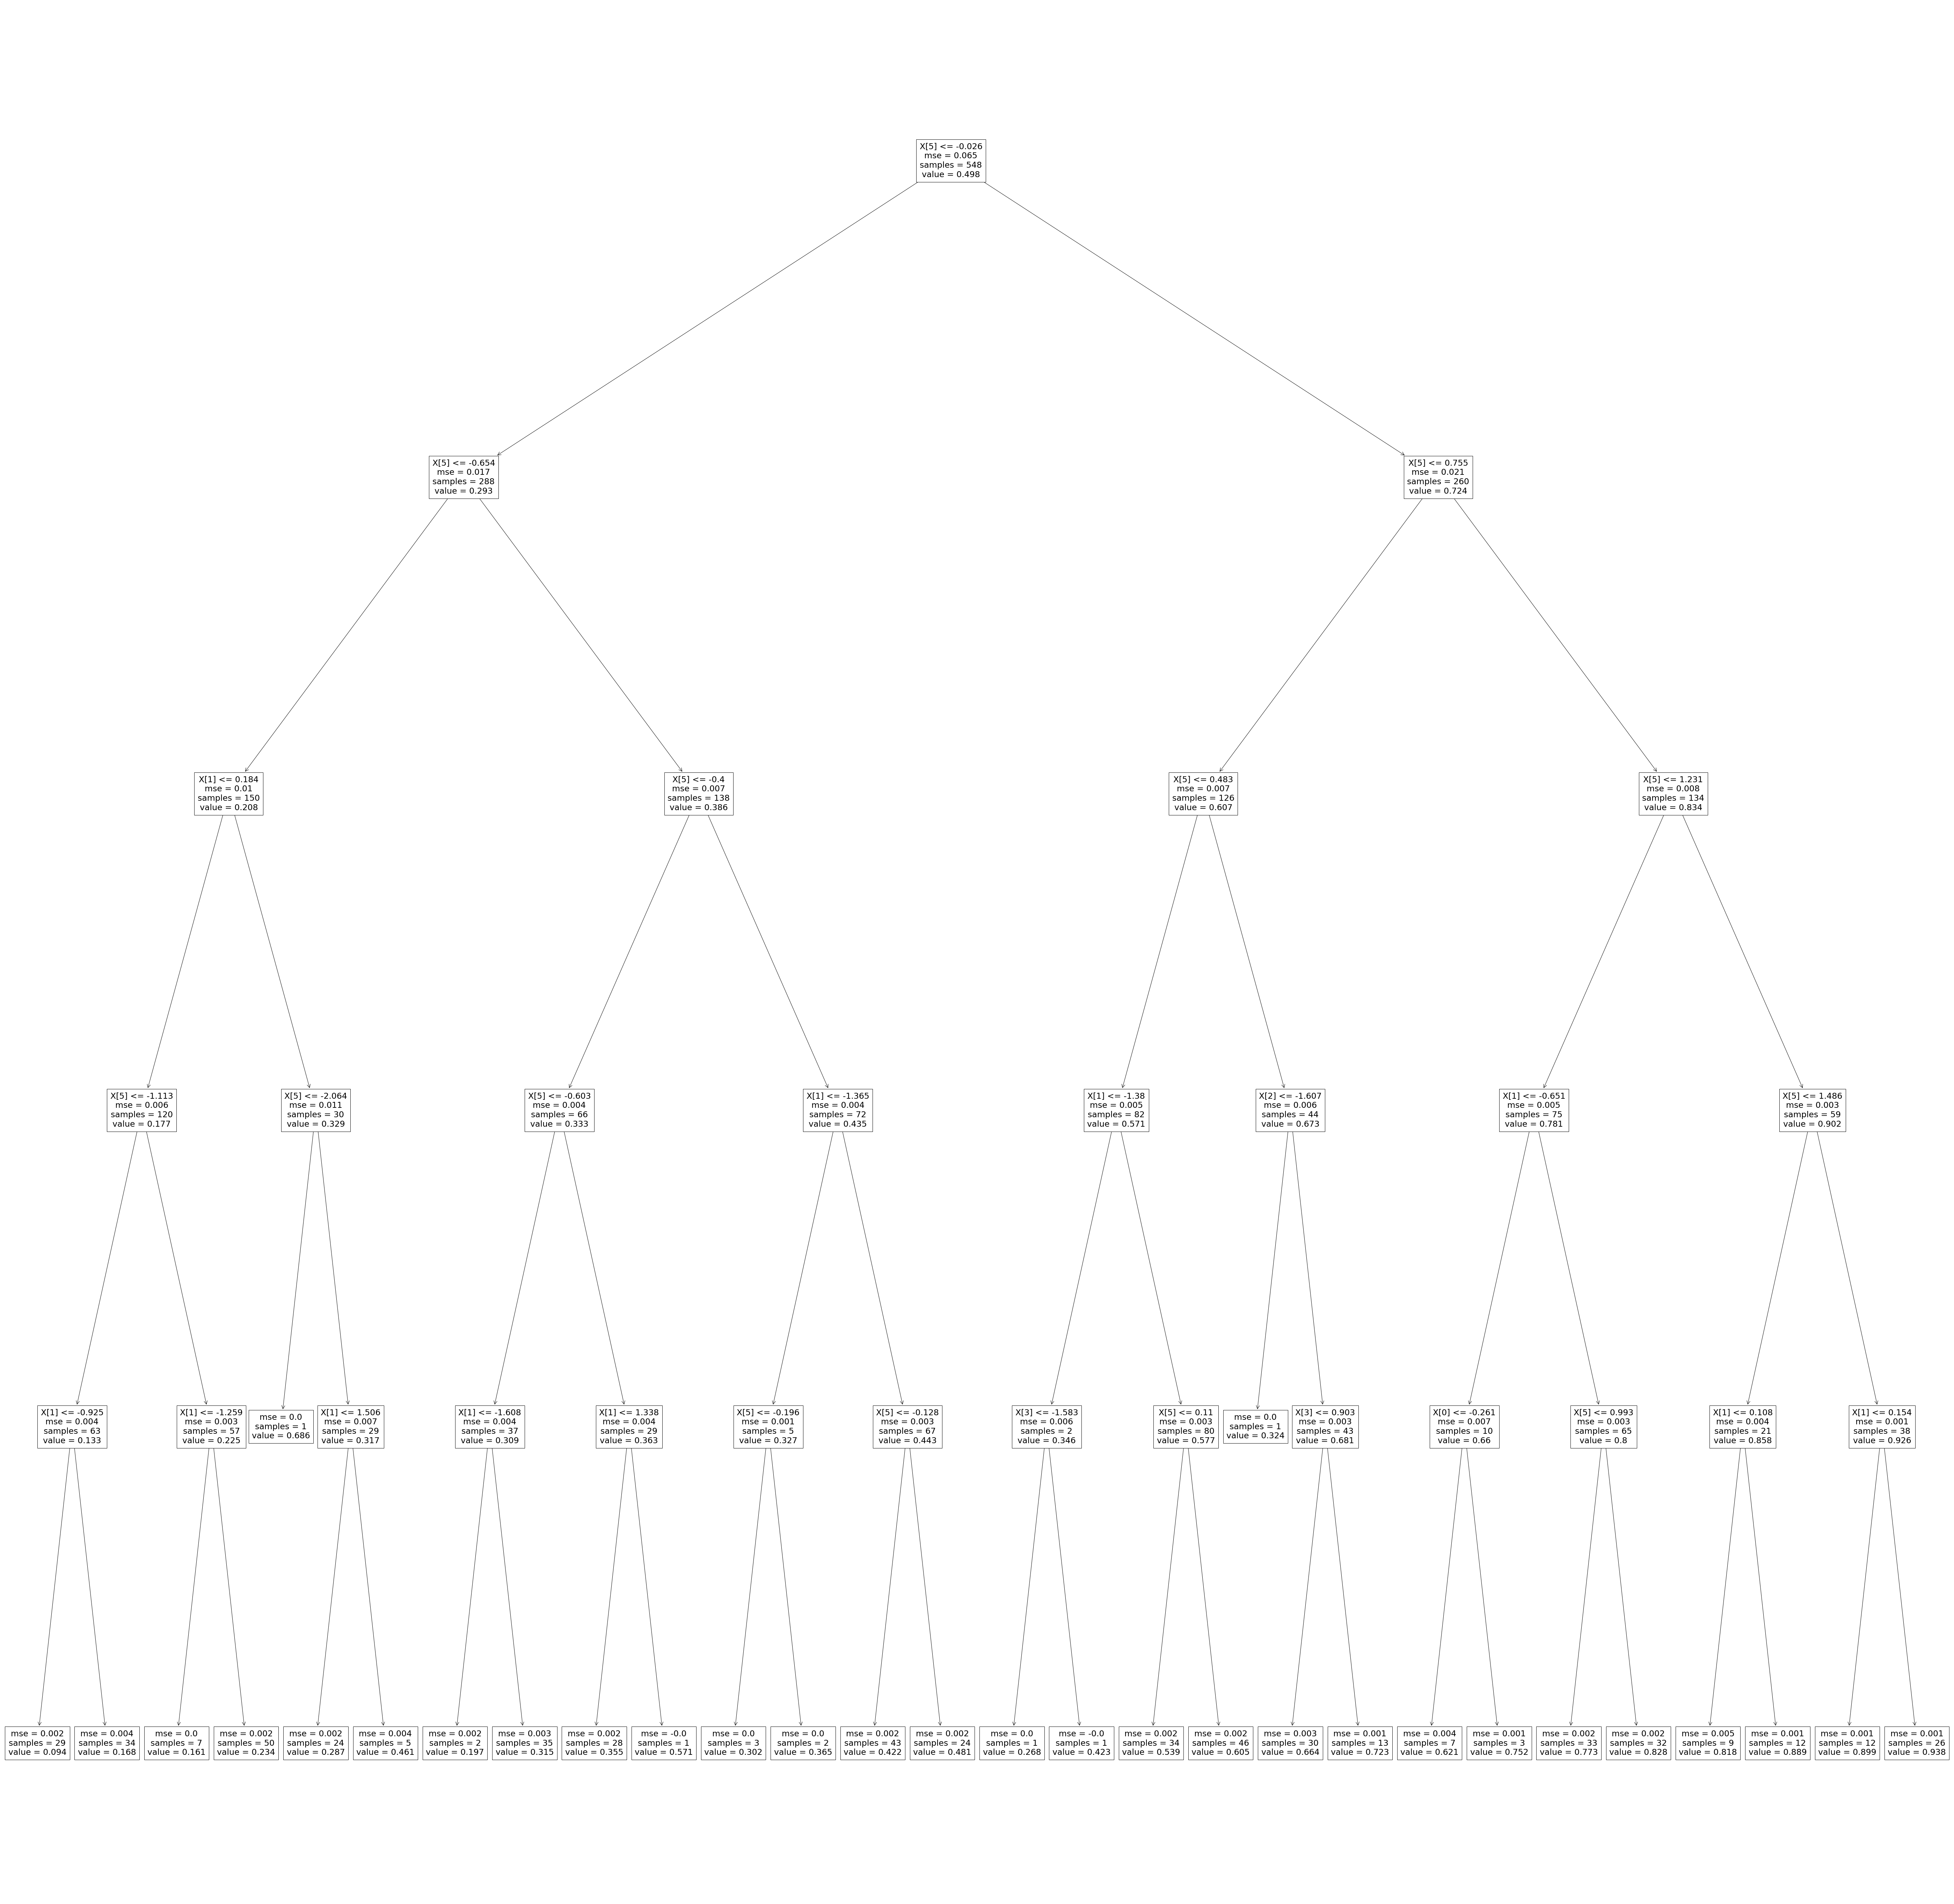

In [298]:
plt.figure(figsize=(100, 100))
plot_tree(dt)
plt.show()

In [299]:
mean_squared_error(y_test, y_res)

0.004291324463470774

In [300]:
y_res = dt.predict(X_val)
mean_squared_error(y_val, y_res)

0.002798255699699279

In [301]:
y_res = dt.predict(X_train)
mean_squared_error(y_train, y_res)

0.002191767132229652

[0.00105484 0.03628527 0.00363644 0.00127435 0.         0.9577491 ]


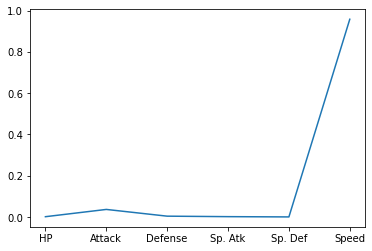

In [302]:
print(dt.feature_importances_)
plt.plot(X_train.columns, dt.feature_importances_)
plt.show()

Добавити до тренувальних даних шум. Зробити це додаючи випадкове(uniform(рівномірний) розподіл в межах [-0.1,0.1]) зміщення до кожного елементу тренувальної вибірки датасету по кожній з ознак.

In [303]:
X_train.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
24,-0.549197,0.092909,-0.399659,-0.678964,-0.028644,0.976012
254,1.177590,-0.089361,1.370991,0.526324,1.661201,0.568400
445,-1.124792,-1.486766,-0.882564,-1.311740,-0.967446,-1.096015
335,1.177590,-0.150118,0.340794,0.014076,0.459534,-0.450629
599,0.985725,1.186530,0.244213,-0.226981,-0.028644,0.806174


In [304]:
X_train_noise = X_train + np.random.RandomState(42).uniform(-0.1, 0.1, X_train.shape)
X_train_noise.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
24,-0.574289,0.183052,-0.353261,-0.659233,-0.097440,0.907211
254,1.089207,-0.016126,1.391214,0.567938,1.565318,0.662382
445,-1.058304,-1.544298,-0.946199,-1.375060,-1.006598,-1.091063
335,1.163979,-0.191872,0.363165,-0.058025,0.417962,-0.477357
599,0.976939,1.243565,0.184148,-0.224134,-0.010161,0.715464


Побудувати 3 різні дерева рішень(Decision tree) з різною глибиною на основі даних згідно варіанту.

In [305]:
errors = []
for i in range(1, 15):
    dt = DecisionTreeRegressor(max_depth=i, random_state=42)
    dt.fit(X_train_noise, y_train)
    y_res = dt.predict(X_val) 
    errors.append(mean_squared_error(y_val, y_res))

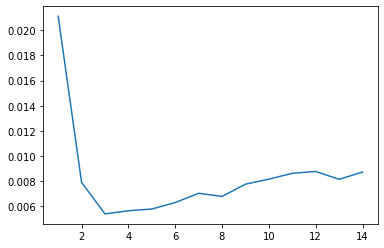

In [306]:
plt.plot(range(1, 15), errors)

Візуалізувати отримані дерева рішень. Порівняти точність отриманих дерев рішень на валідаційній та тренувальній вибірках.

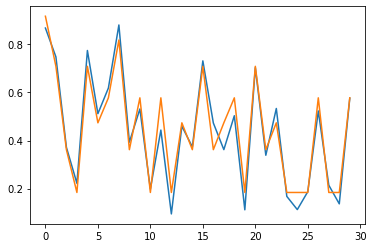

In [307]:
dt = DecisionTreeRegressor(max_depth=3, random_state=42)
dt.fit(X_train_noise, y_train)
y_res = dt.predict(X_test)
plt.plot(range(30), y_test[:30])
plt.plot(range(30), y_res[:30])

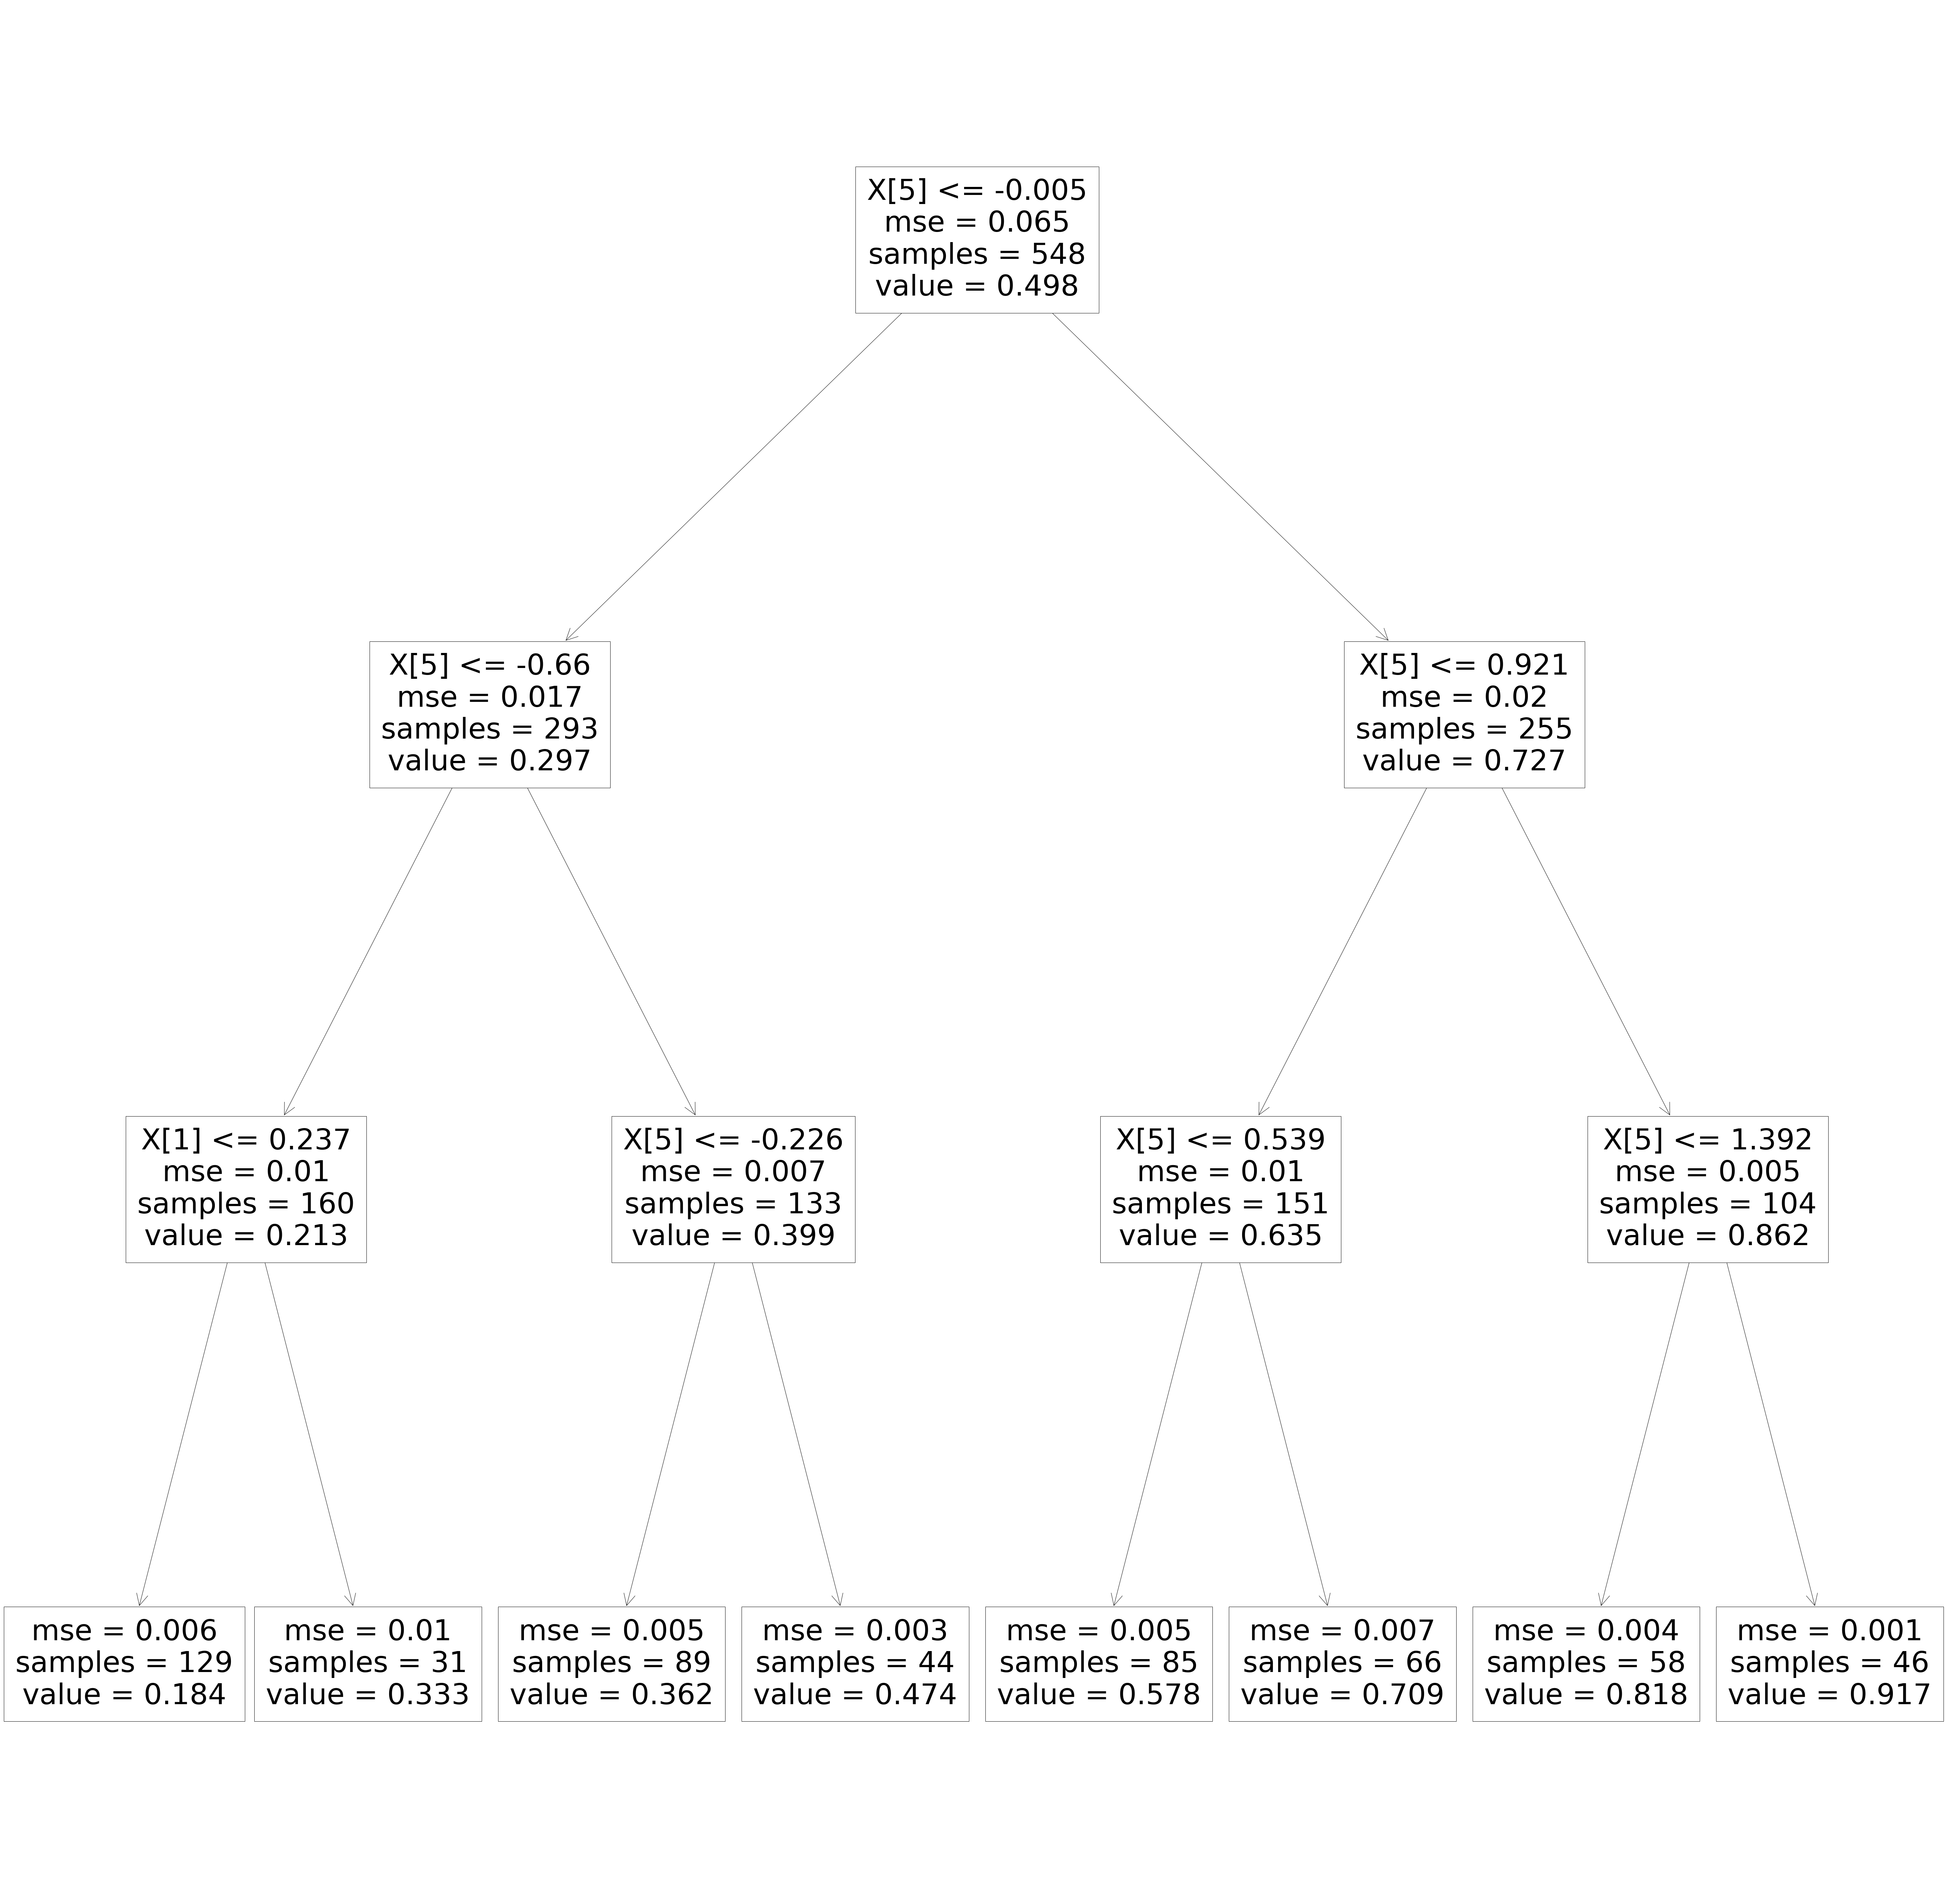

In [308]:
plt.figure(figsize=(100, 100))
plot_tree(dt)
plt.show()

In [309]:
mean_squared_error(y_test, y_res)

0.0056890956954462925

In [310]:
y_res = dt.predict(X_val)
mean_squared_error(y_val, y_res)

0.005410481448413216

In [311]:
y_res = dt.predict(X_train_noise)
mean_squared_error(y_train, y_res)

0.005134433761880642

[0.         0.01704189 0.         0.         0.         0.98295811]


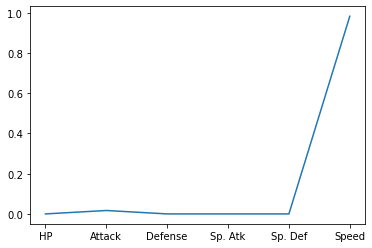

In [312]:
print(dt.feature_importances_)
plt.plot(X_train_noise.columns, dt.feature_importances_)
plt.show()

Обрахувати на оригінальній тренувальній вибірці PCA. Візуалізувати отримані компоненти.

In [313]:
pca = PCA(n_components=0.95)
components = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.47243357, 0.17062856, 0.12943992, 0.11629143, 0.06989501])

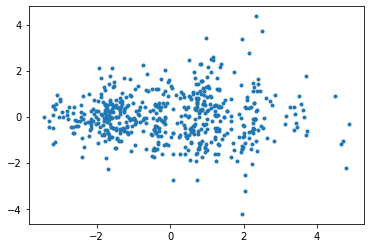

In [314]:
plt.plot(components.T[0], components.T[1], '.')

Обрахувати на зашумленій тренувальній вибірці PCA. Візуалізувати отримані компоненти.

In [315]:
pca = PCA(n_components=0.95)
components_noise = pca.fit_transform(X_train_noise)
pca.explained_variance_ratio_

array([0.47328435, 0.16881675, 0.13004622, 0.11560827, 0.07022543])

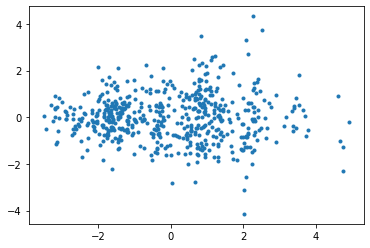

In [316]:
plt.plot(components_noise.T[0], components_noise.T[1], '.')

Реконструювати дані використовуючи PCA обрахований на зашумлених даних для знешумлення. Для цього використати ознаки що пояснюють 95% variance.

In [317]:
X_train_denoise = pca.inverse_transform(components_noise)
X_train_denoise

array([[-0.52142188,  0.06713962, -0.23423201, -0.61747605, -0.21869734,
         0.97167436],
       [ 0.98398255,  0.2145823 ,  1.15430298,  0.48482738,  1.80666459,
         0.53407633],
       [-1.06306304, -1.53386293, -0.95691487, -1.37881881, -0.99568131,
        -1.0968668 ],
       ...,
       [-0.70479566, -0.52696411, -0.48415368, -0.60421297, -0.9088248 ,
        -0.79147516],
       [ 0.39594849,  0.1406815 , -0.65001415, -0.44450089, -0.82589772,
        -0.13491192],
       [-1.19859658, -1.06239752, -1.05434748, -0.72753243, -0.282242  ,
         0.96206046]])

Візуалізувати оригінальні, зашумлені і знешумлені дані.

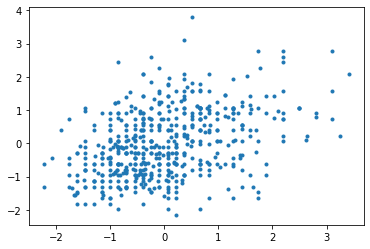

In [318]:
plt.plot(X_train['Attack'], X_train['Speed'], '.')

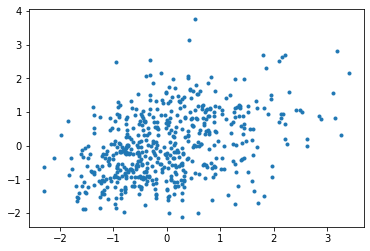

In [319]:
plt.plot(X_train_noise['Attack'], X_train_noise['Speed'], '.')

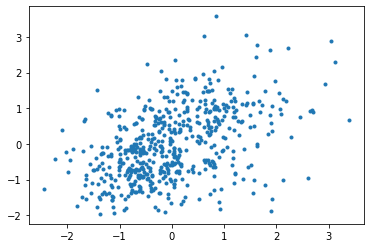

In [320]:
plt.plot(X_train_denoise[:, 1], X_train_denoise[:, 5], '.')

Побудувати на основі зашумлених і знешумлених даних тренувальної вибірки дерева рішень. Порівняти їхню точність на валідаційній та тренувальних вибірках.

In [321]:
errors = []
for i in range(1, 15):
    dt = DecisionTreeRegressor(max_depth=i, random_state=42)
    dt.fit(X_train_denoise, y_train)
    y_res = dt.predict(X_val) 
    errors.append(mean_squared_error(y_val, y_res))

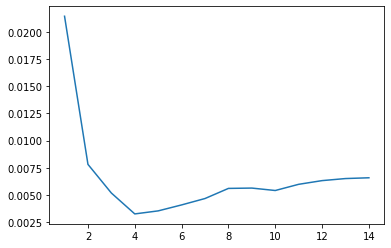

In [322]:
plt.plot(range(1, 15), errors)

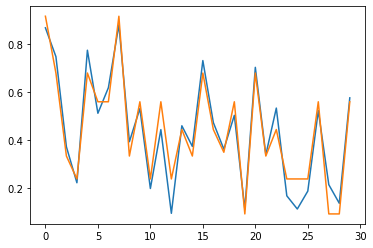

In [323]:
dt = DecisionTreeRegressor(max_depth=4, random_state=42)
dt.fit(X_train_denoise, y_train)
y_res = dt.predict(X_test)
plt.plot(range(30), y_test[:30])
plt.plot(range(30), y_res[:30])

In [324]:
mean_squared_error(y_test, y_res)

0.005320294896472981

In [325]:
y_res = dt.predict(X_val)
mean_squared_error(y_val, y_res)

0.0032506484869672145

In [326]:
y_res = dt.predict(X_train_denoise)
mean_squared_error(y_train, y_res)

0.004243510606605933

Візуалізувати отримані дерева рішень.

[0.00336992 0.0326285  0.00375517 0.         0.         0.96024641]


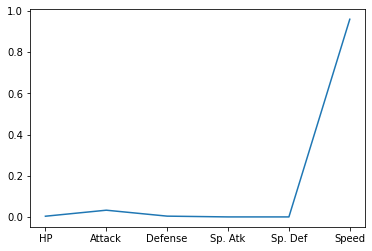

In [327]:
print(dt.feature_importances_)
plt.plot(X_train_noise.columns, dt.feature_importances_)
plt.show()

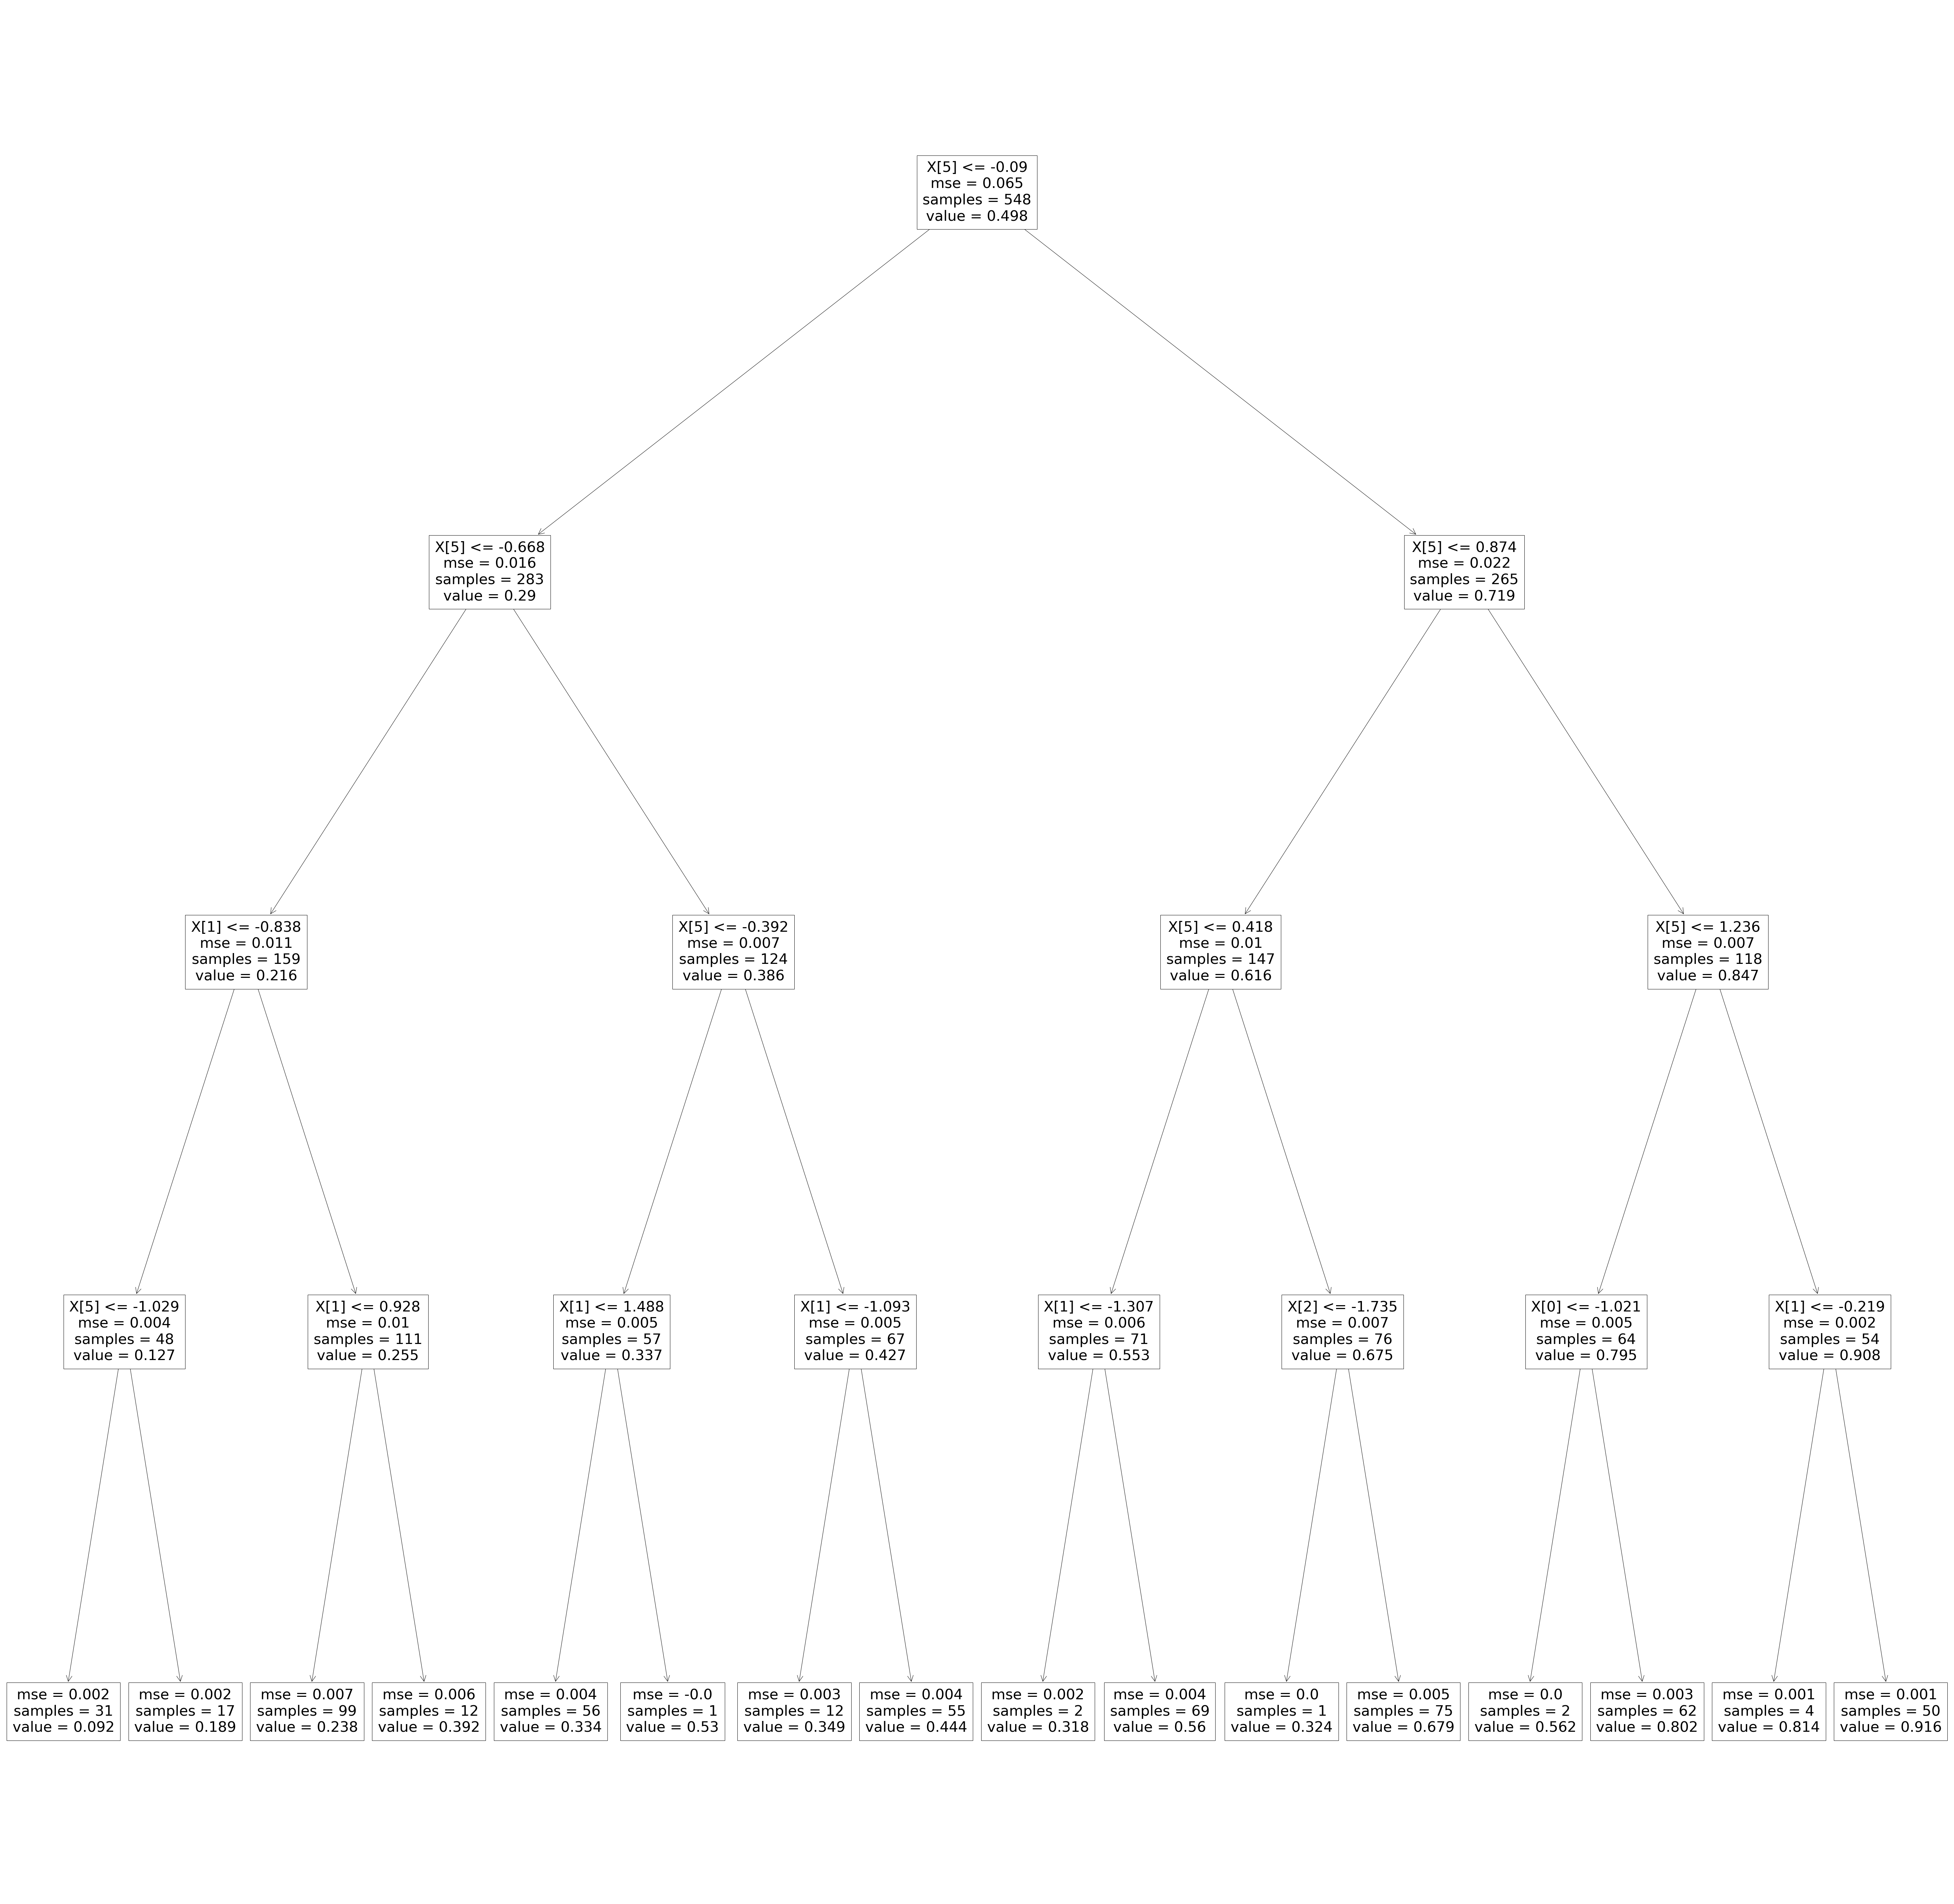

In [328]:
plt.figure(figsize=(100, 100))
plot_tree(dt)
plt.show()